## 1차 과제 - 고객 유지/이탈 자유 분석
- 주제: 가입 고객 이탈 데이터를 분석하여 기업에 인사이트 제공
- 데이터: Customer Churn Data(train data가 따로 있으나 너무 커서 test data만 사용, 예측 성능 향상을 원한다면 train data 사용해도 무방)
https://www.kaggle.com/datasets/muhammadshahidazeem/customer-churn-dataset?select=customer_churn_dataset-training-master.csv
- 사용 라이브러리: 자유

본 과제는 여러분들의 실력을 확인하고자 출제한 과제로 어떠한 가이드라인도 제공하거나 제약하지 않으며 자유롭게 분석하시면 됩니다.

분석이나 예측 어느 쪽이든 상관없으며 몇가지 조건만 유의하여 주시기 바랍니다.

### 조건
1. 기본적인 분석 과정은 EDA(데이터 탐색) > 전처리 > 분석(예측) 진행 > 결과 해석 으로 진행되지만 약간의 수정 허용
2. EDA 과정에서 최소 2개의 시각화 모형(그래프) 사용
3. 분석 및 예측 시 최소 2개의 모형(모델) 사용
4. 전처리는 자유롭게 진행하며 추가적인 데이터 사용이 필요하다면 허용

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/customer_churn_dataset-testing-master.csv')
df

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,3,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,4,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,5,53,Female,58,24,9,2,Standard,Annual,533,18,0
...,...,...,...,...,...,...,...,...,...,...,...,...
64369,64370,45,Female,33,12,6,21,Basic,Quarterly,947,14,1
64370,64371,37,Male,6,1,5,22,Standard,Annual,923,9,1
64371,64372,25,Male,39,14,8,30,Premium,Monthly,327,20,1
64372,64373,50,Female,18,19,7,22,Standard,Monthly,540,13,1


In [ ]:
df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,3,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,4,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,5,53,Female,58,24,9,2,Standard,Annual,533,18,0


In [ ]:
df.tail()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
64369,64370,45,Female,33,12,6,21,Basic,Quarterly,947,14,1
64370,64371,37,Male,6,1,5,22,Standard,Annual,923,9,1
64371,64372,25,Male,39,14,8,30,Premium,Monthly,327,20,1
64372,64373,50,Female,18,19,7,22,Standard,Monthly,540,13,1
64373,64374,52,Female,45,15,9,25,Standard,Monthly,696,22,1


In [ ]:
df.describe()

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000
mean,32187.500000,41.970982,31.994827,15.080234,5.400690,17.133952,541.023379,15.498850,0.473685
std,18583.317451,13.924911,17.098234,8.816470,3.114005,8.852211,260.874809,8.638436,0.499311
min,1.000000,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,16094.250000,30.000000,18.000000,7.000000,3.000000,10.000000,313.000000,8.000000,0.000000
50%,32187.500000,42.000000,33.000000,15.000000,6.000000,19.000000,534.000000,15.000000,0.000000
75%,48280.750000,54.000000,47.000000,23.000000,8.000000,25.000000,768.000000,23.000000,1.000000
max,64374.000000,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64374 entries, 0 to 64373
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   CustomerID         64374 non-null  int64 
 1   Age                64374 non-null  int64 
 2   Gender             64374 non-null  object
 3   Tenure             64374 non-null  int64 
 4   Usage Frequency    64374 non-null  int64 
 5   Support Calls      64374 non-null  int64 
 6   Payment Delay      64374 non-null  int64 
 7   Subscription Type  64374 non-null  object
 8   Contract Length    64374 non-null  object
 9   Total Spend        64374 non-null  int64 
 10  Last Interaction   64374 non-null  int64 
 11  Churn              64374 non-null  int64 
dtypes: int64(9), object(3)
memory usage: 5.9+ MB


정수형이 아닌 데이터가 Gender, Subscription Type, Contract Length 총 3개 존재한다


In [ ]:
df2 = df.copy()
df2

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,3,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,4,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,5,53,Female,58,24,9,2,Standard,Annual,533,18,0
...,...,...,...,...,...,...,...,...,...,...,...,...
64369,64370,45,Female,33,12,6,21,Basic,Quarterly,947,14,1
64370,64371,37,Male,6,1,5,22,Standard,Annual,923,9,1
64371,64372,25,Male,39,14,8,30,Premium,Monthly,327,20,1
64372,64373,50,Female,18,19,7,22,Standard,Monthly,540,13,1


In [ ]:
df2.isnull().sum()

,0
CustomerID,0
Age,0
Gender,0
Tenure,0
Usage Frequency,0
Support Calls,0
Payment Delay,0
Subscription Type,0
Contract Length,0
Total Spend,0


In [ ]:
df2.isna().sum()

,0
CustomerID,0
Age,0
Gender,0
Tenure,0
Usage Frequency,0
Support Calls,0
Payment Delay,0
Subscription Type,0
Contract Length,0
Total Spend,0


In [ ]:
# 해당 데이터는 12개의 변수로 이루어져 있으며, 이상치와 결측치는 존재하지 않는다.

In [ ]:
df2 = df2.rename(columns={'CustomerID':'ID'})
df2 = df2.rename(columns={'Usage Frequency':'UF'})
df2 = df2.rename(columns={'Subscription Type':'Type'})

In [ ]:
df2.groupby('Gender') \
   .agg(n = ('Churn','count'))

,n
Gender,
Female,34353
Male,30021


In [ ]:
df2.groupby(['Gender', 'Churn']) \
   .agg(n = ('Churn','count'))

n
Gender Churn       
Female 0      15442
       1      18911
Male   0      18439
       1      11582

직관적으로 여성은 1, 남성은 0의 개수나 비중이 더 높아 여성이 남성보다 더 이탈을 많이 했다는 것을 알 수 있다.

In [ ]:
# 시각화1 - Type별 Total Spend 평균 계산 후 막대그래프
avg = df2.groupby('Type',as_index=False) \
         .agg(mean_spend = ('Total Spend', 'mean'))
avg

,Type,mean_spend
0,Basic,540.908536
1,Premium,543.581579
2,Standard,538.589387


(500.0, 550.0)

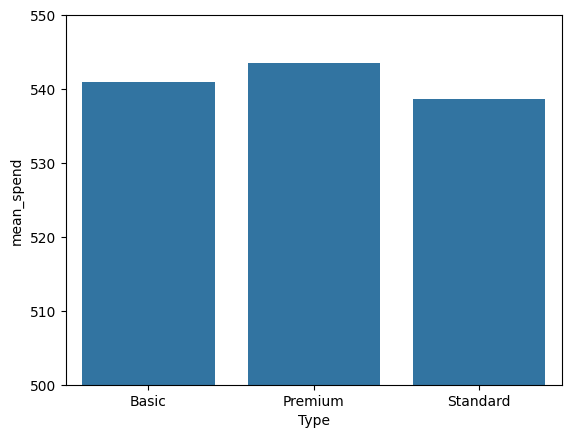

In [ ]:
sns.barplot(data=avg, x='Type', y='mean_spend')
plt.ylim(500,550)

<Axes: ylabel='Last Interaction'>

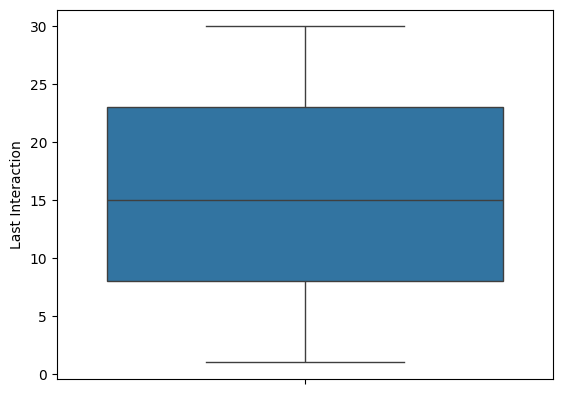

In [ ]:
# 시각화 2 - 구독을 중단한 고객들의 last interaction boxplot 그리기
df3 = df2.query('Churn == 1')
sns.boxplot(data=df3,y='Last Interaction')

구독을 중단한 고객들의 last interaction 분포는 8~24 사이에 대부분 데이터들이 분포하고, 극단치가 존재하지 않아 대부분의 값들이 사분위 범위에 존재한다.

In [ ]:
# 분석1 - 변수 간 상관분석
df2[['Age','UF']].corr()
from scipy import stats
stats.pearsonr(df2['Age'],df2['UF'])

PearsonRResult(statistic=-0.03833061623100249, pvalue=2.2761059491658776e-22)

나이와 사용빈도의 상관계수는 -0.04로 반비례 관계이며, 유의확률이 0.05보다 작으므로 통계적으로 유의하다.

---



In [ ]:
df2['Gender'] = df2['Gender'].map({'Male': 0, 'Female': 1})

In [ ]:
df2['Type'] = df2['Type'].map({'Basic': 0, 'Standard': 1, 'Premium':2})

In [ ]:
df2['Contract Length'] = df2['Contract Length'].map({'Monthly': 0, 'Quarterly': 1, 'Annual':2})

In [ ]:
df2

,ID,Age,Gender,Tenure,UF,Support Calls,Payment Delay,Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,1,25,14,4,27,0,0,598,9,1
1,2,41,1,28,28,7,13,1,0,584,20,0
2,3,47,0,27,10,2,29,2,2,757,21,0
3,4,35,0,9,12,5,17,2,1,232,18,0
4,5,53,1,58,24,9,2,1,2,533,18,0
...,...,...,...,...,...,...,...,...,...,...,...,...
64369,64370,45,1,33,12,6,21,0,1,947,14,1
64370,64371,37,0,6,1,5,22,1,2,923,9,1
64371,64372,25,0,39,14,8,30,2,0,327,20,1
64372,64373,50,1,18,19,7,22,1,0,540,13,1


<Axes: >

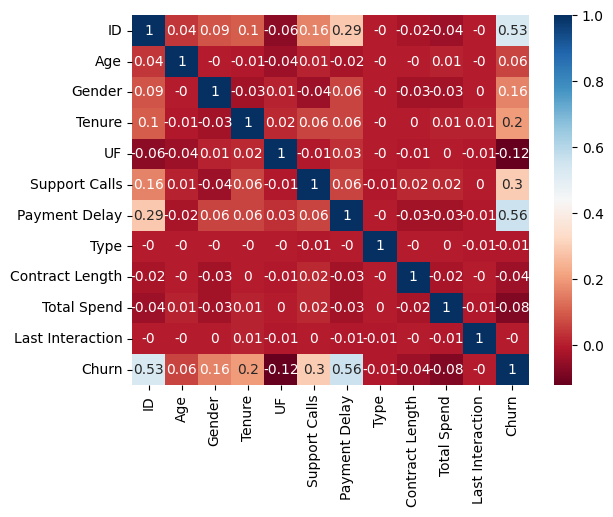

In [ ]:
c_df2 = df2.corr()
c_df2 = round(c_df2,2)
sns.heatmap(c_df2, annot = True, cmap = 'RdBu')

상관분석 히트맵을 보면, 거의 모든 변수들이 서로 음의 상관관계를 나타낸다고 볼 수 있다.

In [ ]:
# 분석 2 - 이탈고객과 유지고객의 지불지연 평균 차이가 유의미한지 검정
on = df2.query('Churn == 0')['Payment Delay']
off = df2.query('Churn == 1')['Payment Delay']

In [ ]:
stats.ttest_ind(on,off,equal_var=True)

TtestResult(statistic=-170.3309344054242, pvalue=0.0, df=64372.0)

p-value값이 0.05보다 작으므로 이탈고객과 유지고객의 지불지연 평균 차이는 통계적으로 유의미하다고 볼 수 있다.